## BLINKIT ANALYSIS PROJECT

### Import libraries

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb

### Import raw data

In [2]:
df=pd.read_csv("C:/Data Analysis/Python/blinkit_data (1).csv")

### Sample data

In [3]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### Size of data

In [4]:
print("Size of data: ",df.shape)

Size of data:  (8523, 12)


### Data cleaning

In [5]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [6]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [7]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'
                                                      })

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### Business Requirements

In [9]:
#Total Sales
tot_sales=df['Sales'].sum()

# Average Sales
avg_sales=df['Sales'].mean()

# No. of items sold
items_sold=df['Sales'].count()

# Average Ratings
avg_rating=df['Rating'].mean()

# Display
print(f"Total Sales: ${tot_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"Number of Items sold: {items_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
Number of Items sold: 8,523
Average Rating: 4.0


### Charts Requirements

#### Total Sales by Fat Content

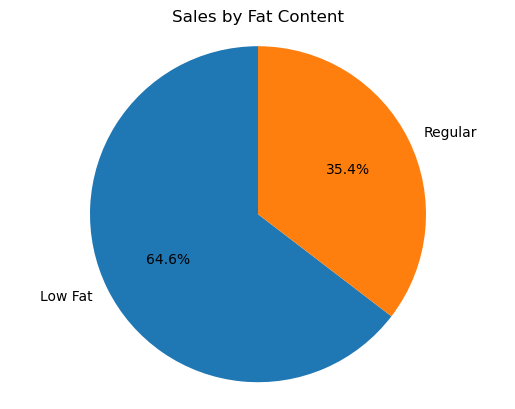

In [10]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()

mpl.pie(sales_by_fat, labels= sales_by_fat.index,
       autopct='%.1f%%',
       startangle=90)

mpl.title('Sales by Fat Content')
mpl.axis('equal')
mpl.show()

#### Total Sales Item Type

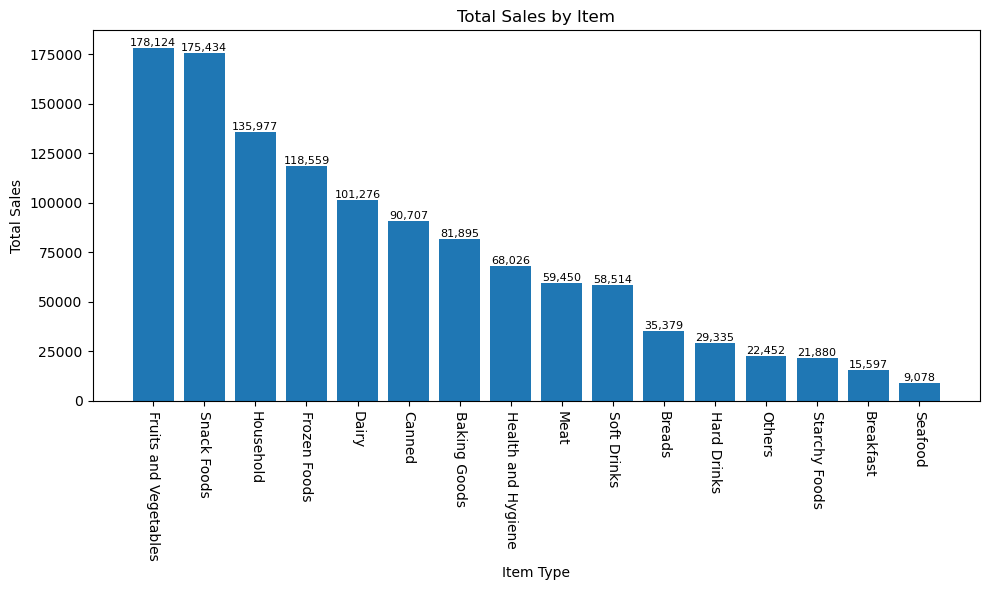

In [11]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

mpl.figure(figsize=(10,6))
bars=mpl.bar(sales_by_type.index,sales_by_type.values)

mpl.xticks(rotation=-90)
mpl.xlabel('Item Type')
mpl.ylabel('Total Sales')
mpl.title('Total Sales by Item')

for bar in bars:
    mpl.text(bar.get_x()+ bar.get_width()/2, bar.get_height(),
        f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

mpl.tight_layout()
mpl.show()

#### Fat Content by Outlet for Total Sales

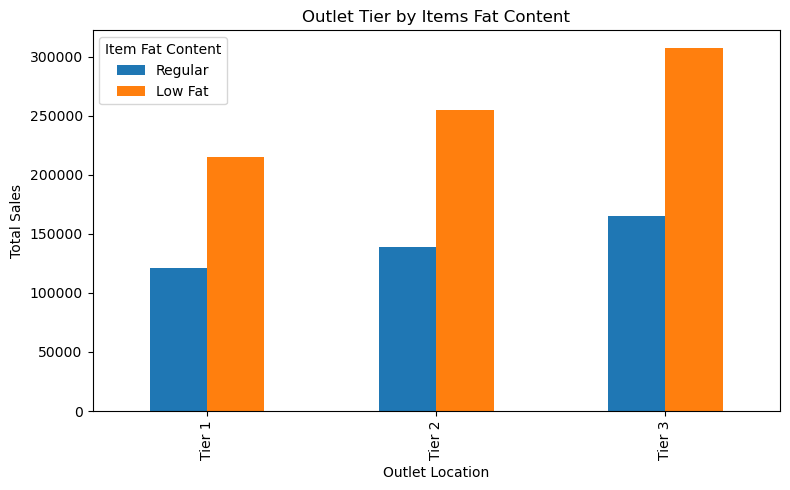

In [12]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Items Fat Content')
mpl.xlabel('Outlet Location')
mpl.ylabel('Total Sales')
mpl.legend(title='Item Fat Content')
mpl.tight_layout()
mpl.show()


#### Total Sales by Outlet Establishment

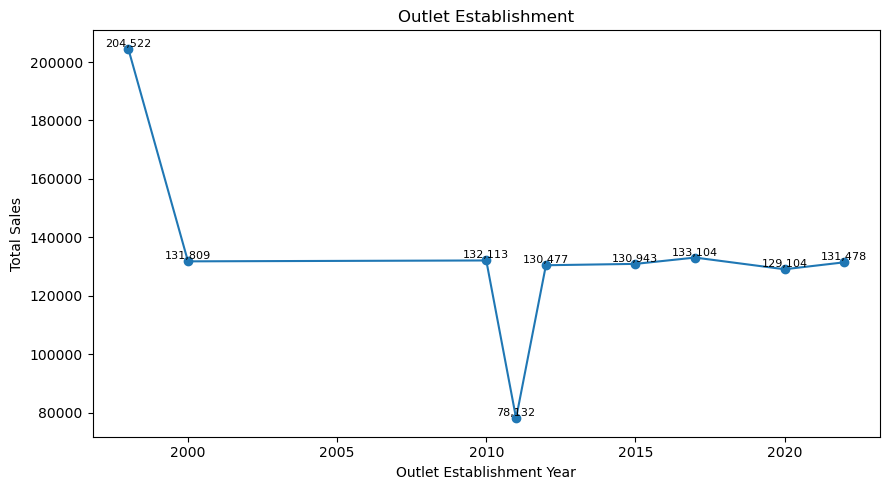

In [16]:
sales_by_type=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

mpl.figure(figsize=(9,5))
mpl.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

mpl.xlabel('Outlet Establishment Year')
mpl.ylabel('Total Sales')
mpl.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    mpl.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

mpl.tight_layout()
mpl.show()

#### Sales by Outlet Size

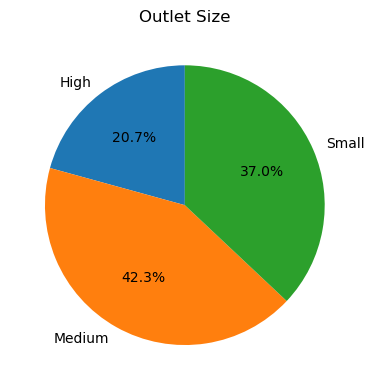

In [20]:
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()

mpl.figure(figsize=(4,4))
mpl.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
mpl.title('Outlet Size')
mpl.tight_layout()
mpl.show()

#### Sales by Outlet Location

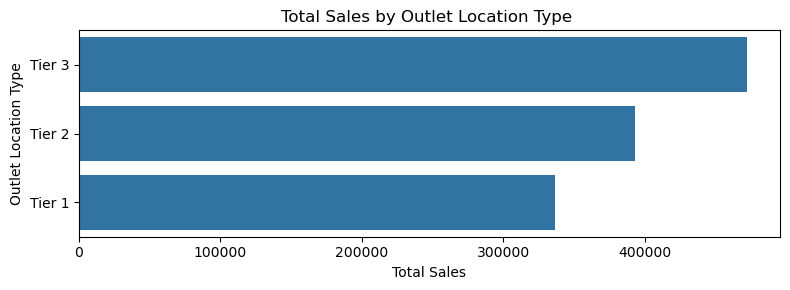

In [22]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

mpl.figure(figsize=(8,3))
ax=sb.barplot(x='Sales',y='Outlet Location Type', data=sales_by_location)

mpl.title('Total Sales by Outlet Location Type ')
mpl.xlabel('Total Sales')
mpl.ylabel('Outlet Location Type')

mpl.tight_layout()
mpl.show()